<a href="https://colab.research.google.com/github/Yolde/Haruna_Portfolio.github.io/blob/main/Multiple_Linear_Regression_Analysis_of_Seismic_Amplitude_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Simulate data
np.random.seed(42)
n = 100
frequency = np.random.uniform(1, 10, n)  # Independent variable X1
depth = np.random.uniform(100, 1000, n)  # Independent variable X2
noise = np.random.normal(0, 10, n)  # Random noise
amplitude = 5 + 2 * frequency - 0.01 * depth + noise  # Dependent variable Y

In [4]:
# Create DataFrame
data = pd.DataFrame({
    'Frequency': frequency,
    'Depth': depth,
    'Amplitude': amplitude
})


   Frequency       Depth  Amplitude
0   4.370861  128.286267   5.658612
1   9.556429  672.769370  19.707701
2   7.587945  382.920383  19.277412
3   6.387926  557.713622   5.055202
4   2.404168  916.809827  19.297982


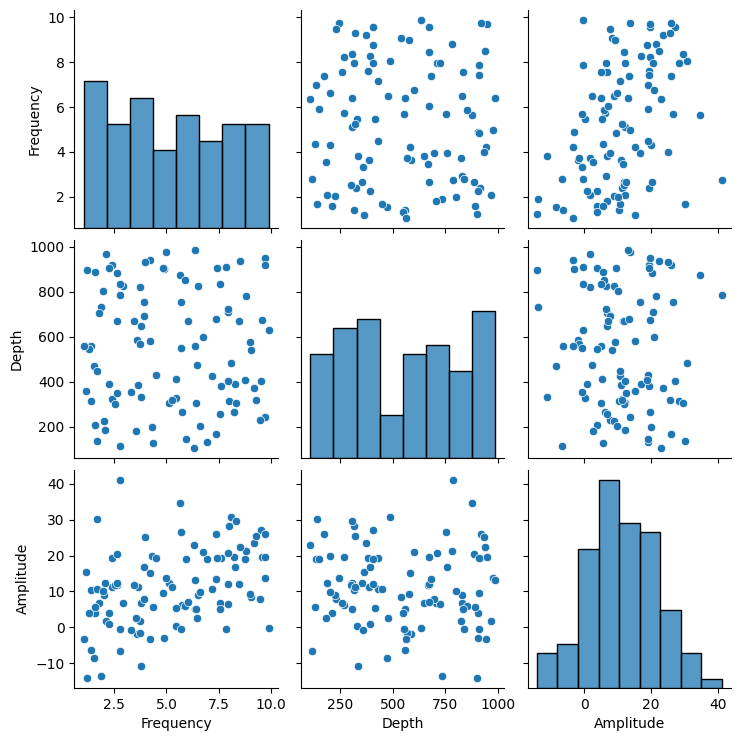

LinearRegression()

In [5]:

# Display the first few rows
print(data.head())

# Visualize relationships
sns.pairplot(data)
plt.show()

# Split data into training and testing sets
X = data[['Frequency', 'Depth']]  # Independent variables
y = data['Amplitude']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


In [6]:
# Display model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")  # Corresponds to Frequency and Depth

# Predict on the test set
y_pred = model.predict(X_test)

Intercept: 2.3356906354786044
Coefficients: [ 1.72224676e+00 -1.25362507e-03]


Mean Squared Error (MSE): 66.6432098865189
R-squared (R²): 0.09976322455819209


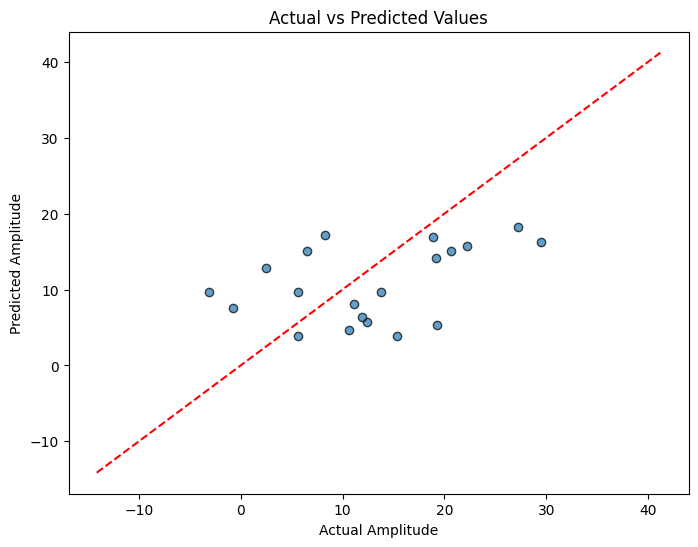

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Amplitude")
plt.ylabel("Predicted Amplitude")
plt.title("Actual vs Predicted Values")
plt.show()

In [8]:
#Interpretation of Results
#A low MSE and high R² indicate a good model fit.
#Positive coefficients: Y increases as Xi increases.
#Negative coefficients: Y decreases as Xi increases.